# Dno Oka (na 3)

In [1]:
from vessel_util import *
plt.rcParams['figure.figsize'] = (14, 7)

Loaded: ['01_dr', '01_g', '01_h', '02_dr', '02_g', '02_h', '03_dr', '03_g', '03_h', '04_dr', '04_g', '04_h', '05_dr', '05_g', '05_h', '06_dr', '06_g', '06_h', '07_dr', '07_g', '07_h', '08_dr', '08_g', '08_h', '09_dr', '09_g', '09_h', '10_dr', '10_g', '10_h', '11_dr', '11_g', '11_h', '12_dr', '12_g', '12_h', '13_dr', '13_g', '13_h', '14_dr', '14_g', '14_h', '15_dr', '15_g', '15_h']


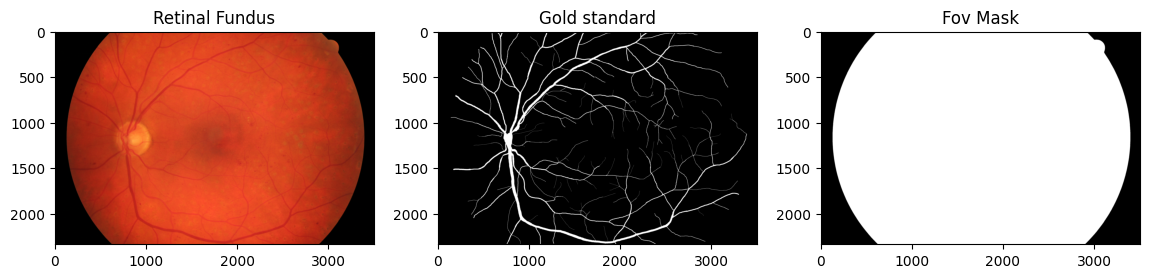

In [2]:
# Load all samples
sample_names = get_all_sample_names()
print(f"Loaded: {sample_names}")
sample_name = sample_names[0]
image = load_image(sample_name)
gold_standard = load_gold_standard(sample_name)
fov_mask = load_fov(sample_name)

plt.subplot(131)
plt.title("Retinal Fundus")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.title("Gold standard")
plt.imshow(gold_standard, cmap='gray', vmin=0, vmax=255)

plt.subplot(133)
plt.title("Fov Mask")
plt.imshow(fov_mask, cmap='gray', vmin=0, vmax=255)

# Przetwarzanie (na 3) 
- odwzorowanie na kroki, funkcji `process_image_using_cv` (jeżeli coś się zmieni, trzeba pamiętać o tym)

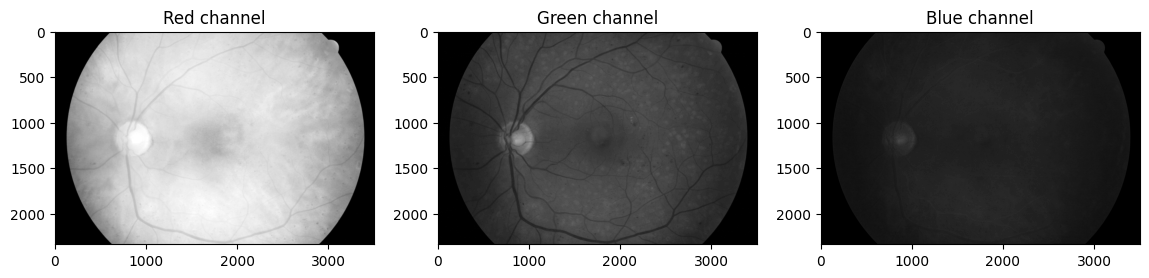

In [3]:
b, g, r = cv2.split(image)
plt_show_channels(r, g, b)

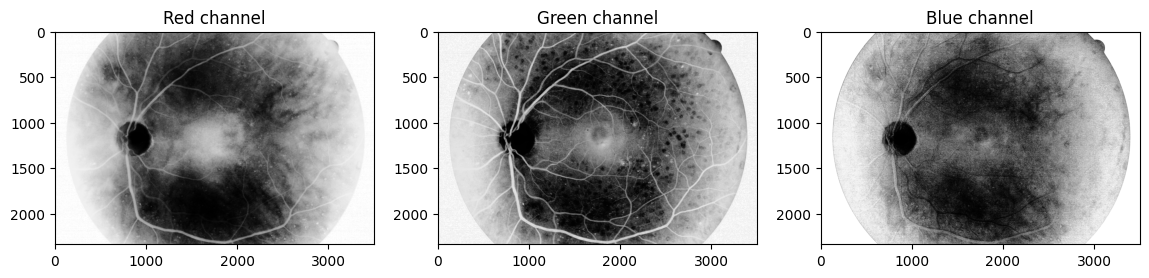

In [4]:
r_pre, g_pre, b_pre = map(preprocess_channel, (r, g, b))
plt_show_channels(r_pre, g_pre, b_pre)

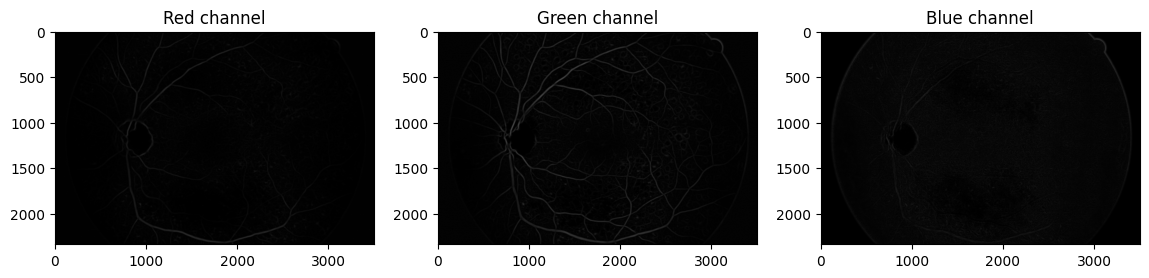

In [5]:
r_ridge, g_ridge, b_ridge = map(ridge_detect_channel, (r_pre, g_pre, b_pre))
plt_show_channels(r_ridge, g_ridge, b_ridge)

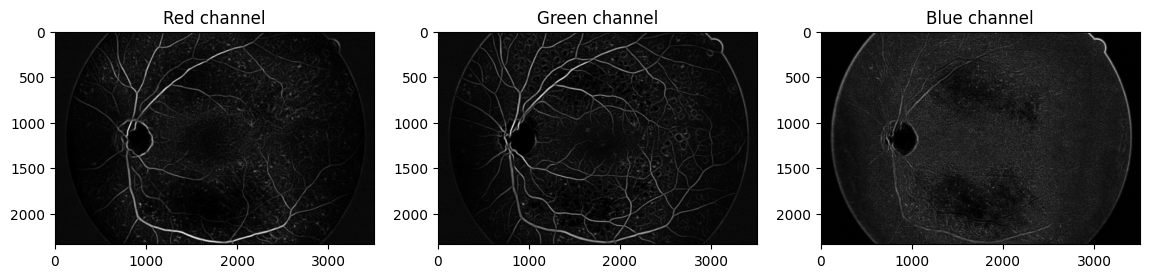

In [6]:
normalize = lambda x: (x - x.min()) / (x.max() - x.min()) * 255
r_norm, g_norm, b_norm = map(normalize, (r_ridge, g_ridge, b_ridge))
plt_show_channels(r_norm, g_norm, b_norm)

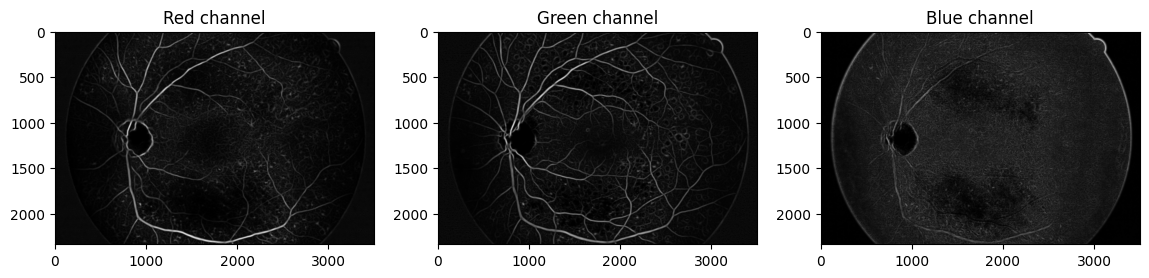

In [7]:
# TODO: Add something better as postprocessing component? -> mark vessels better, ignore the "white spots" 
# -> maybe something like blurring + sharpening ? 
r_post, g_post, b_post = map(postprocess_channel, (r_norm, g_norm, b_norm), [ 11 ] * 3) 
plt_show_channels(r_post, g_post, b_post)

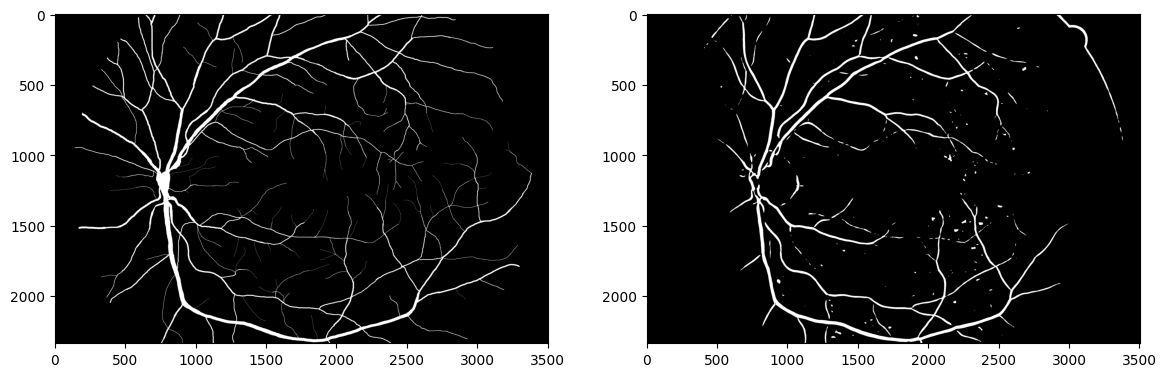

In [8]:
# TODO: magic number?
weights = [ 0.3, 0.7, 0] # 30% of red, 70% of green
threshold = 55
mask = combine_channels(r_post, g_post, b_post, threshold=threshold, weights=weights)
plt_compare_two_images(gold_standard, mask, grayscale=True)

In [9]:
print_statistics(gold_standard, mask)

Accuracy: 66.00%
Sensitivity: 98.44%
Specificity: 56.67%
Mean(spec, sens): 77.55%
GeoMean(spec, sens): 74.69%


# Skuteczność dla przykładów

In [10]:
import random

SAMPLE_SIZE = 3
THRESHOLD = 55
CHANNEL_WEIGHTS = [0.3, 0.7, 0]
BLUR_KERNEL_SIZE = 11

sample_names = get_all_sample_names()
used_samples = random.sample(sample_names, SAMPLE_SIZE)

print(f"Selected samples: {used_samples}")

for sample in used_samples:
    print(f"==== Sample: {sample}")
    
    image = load_image(sample)
    fov = load_fov(sample)

    mask = process_image_using_cv(
        image, 
        fov, 
        threshold=THRESHOLD, 
        channel_weights=CHANNEL_WEIGHTS,
        blur_kernel_size=BLUR_KERNEL_SIZE
    )

    gold_standard = load_gold_standard(sample)
    print_statistics(gold_standard, mask)
    



Selected samples: ['04_dr', '14_g', '09_h']
==== Sample: 04_dr
Accuracy: 54.93%
Sensitivity: 97.91%
Specificity: 42.52%
Mean(spec, sens): 70.21%
GeoMean(spec, sens): 64.52%
==== Sample: 14_g
Accuracy: 71.29%
Sensitivity: 98.51%
Specificity: 48.54%
Mean(spec, sens): 73.53%
GeoMean(spec, sens): 69.15%
==== Sample: 09_h
Accuracy: 90.11%
Sensitivity: 99.63%
Specificity: 40.14%
Mean(spec, sens): 69.89%
GeoMean(spec, sens): 63.24%
